In [1]:
import numpy as np
import pickle

In [2]:
with open('data.pkl','rb') as f:
    data=pickle.load(f)

In [3]:
X=data[:,:-1]
y=data[:,-1]

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
W=np.random.randn(9)*0.01

In [6]:
def forward_propagation(X, y, W):
    a=W[0]*X[0]+W[1]*X[1]
    part_1=a**2+W[5] 
    exp= np.exp(part_1)
    part_2=exp+W[6]
    tanh=np.tanh(part_2)
    b=W[2]*X[2]
    c=W[3]*X[3]+W[4]*X[4]
    part_3=np.sin(b)*c+W[7]
    sig=sigmoid(part_3)
    y_=tanh+sig*W[8]
    L=(y-y_)**2
    dL=-2*(y-y_)
    nodes={'a':a,'b':b,'c':c,'exp':exp,'tanh':tanh,'sigmoid':sig,'y_':y_,'loss':L,'dy_pr':dL}
    return nodes

In [7]:
def backward_propagation(X,y,Wi):
    nodes= forward_propagation(X, y, Wi)
    lst=[]
    for i in nodes.values():
        lst.append(i)
    [a,b,c,exp,tanh,sig,y_,L,dL]=lst
    dL=-2*(y-y_)
    dw9=sig*dL
    #dw8=dL*W[8]*sig*(1-sig)
    dw8=((dw9/sig)*Wi[8]*(sig*(1-sig)))
    dw3=dw8*c*X[2]*np.cos(b)
    dw4=dw8*X[3]*np.sin(b)
    dw5=dw8*X[4]*np.sin(b)
    dw7=(1-tanh**2)*dL
    dw6=dw7*exp
    #dw2=dw6*2*a*X[1]
    dw2=(1-tanh**2)*dL*exp*2*a*X[1]
    dw1=dw6*2*a*X[0]
    #dw= [dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9]
    dw={'dw1':dw1,'dw2':dw2,'dw3':dw3,'dw4':dw4,'dw5':dw5,'dw6':dw6,'dw7':dw7,'dw8':dw8,'dw9':dw9}
    return dw

In [8]:
def dict_to_list(d):
    dW=[]
    for key in d:
        dW.append(d[key])
    return dW

In [9]:
def grad_check(X,W,y):
    dw_approx=[]
    epsilon=0.0001
    for i in range(len(W)):
        a=W[i]
        W[i]=W[i]+epsilon
        nodes_1=forward_propagation(X,y,W)
        L1=nodes_1['loss']
        W[i]=a
        W[i]=W[i]-epsilon
        nodes_2=forward_propagation(X,y,W)
        L2=nodes_2['loss']
        W[i]=a
        change_loss=(L1-L2)/(2*(epsilon))
        dw_approx.append(change_loss)
    dw_bp=backward_propagation(X,y,W)
    dw_bp=np.array(dict_to_list(dw_bp)).reshape(-1,1)
    dw_approx=np.array(dw_approx).reshape(-1,1) 
    num = np.linalg.norm(dw_bp-dw_approx)
    den = (np.linalg.norm(dw_bp))+(np.linalg.norm(dw_approx))
    grad_check = num/den
    if (grad_check < 1e-7):
        print("Gradient checking is done!")
    else:
        print("please debug your code")
    return grad_check,dw_approx,dw_bp

In [10]:
grad_check,dw_approx,dw_bp=grad_check(X[1,:],W,y[1])

Gradient checking is done!


In [11]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

In [12]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

In [13]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702)
    dw2=(data['dw2']==-0.02140761471775293)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9 )
    return True 
w=np.ones(9)*0.1
d1=backward_propagation(X[0],y[0],w)
grader_backprop(d1)

True

## Vannila optimizer

In [14]:
def vanilla_optimizer(X,y,W,epoch,alpha=0.01):
    total_loss=[]
    m=X.shape[0]
    for i in range(epoch): 
        loss=[]
        for j in range(m):
            dW=backward_propagation(X[j,:],y[j],W)
            dW=np.array(dict_to_list(dW))
            W=W-alpha*(dW)
            nodes=forward_propagation(X[j,:],y[j],W)
            loss.append(nodes['loss'])
        total_loss.append(np.mean(loss))
    return total_loss           

In [15]:
total_loss=vanilla_optimizer(X,y,W,epoch=30,alpha=0.01)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
epoch=30

Text(0.5, 1.0, 'Loss vs  No of iterations')

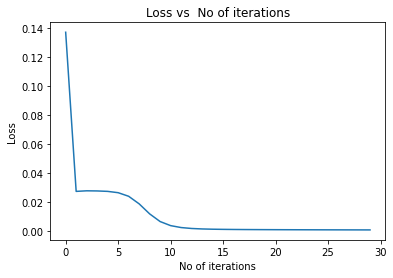

In [18]:
plt.plot(list(range(epoch)),total_loss)
plt.xlabel("No of iterations")
plt.ylabel("Loss")
plt.title("Loss vs  No of iterations")

## SGD+ Momentum

In [19]:
def momentum_optimizer(X,y,W,epoch,alpha=0.01,beta=0.9):
    total_loss=[]
    m=X.shape[0]
    
    V=np.zeros(len(W))
    for i in range(epoch):
        loss=[]
        for j in range(m):
            dW=backward_propagation(X[j,:],y[j],W)
            dW=np.array(dict_to_list(dW))
            
            V=beta*V+(1-beta)*dW
            W=W-alpha*V
            nodes=forward_propagation(X[j,:],y[j],W)
            loss.append(nodes['loss'])
        total_loss.append(np.mean(loss))
    return total_loss           

In [20]:
m_loss= momentum_optimizer(X,y,W,epoch,alpha=0.01,beta=0.9)

Text(0.5, 1.0, 'Loss vs  No of iterations')

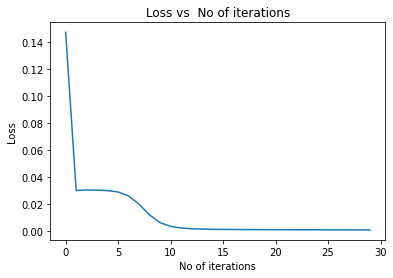

In [21]:
plt.plot(list(range(epoch)),m_loss)
plt.xlabel("No of iterations")
plt.ylabel("Loss")
plt.title("Loss vs  No of iterations")

## Adam optimizer

In [25]:
def adam_optimizer(X,y,W,epoch,beta1=0.9,beta2=0.999,epsln=1e-7,alpha=0.01):
    total_cost=[]
    mt=np.zeros(len(W))
    vt=np.zeros(len(w))
    m=X.shape[0]
    for i in range(epoch):
        loss=[]
        for j in range(m):
            dW=backward_propagation(X[j,:],y[j],W)
            dW=np.array(dict_to_list(dW))
            
            mt=beta1*mt+(1-beta1)*(dW)
            vt=beta2*vt+(1-beta2)*np.square(dW)
            mt=mt/(1-np.power(beta1,j+1))
            vt=vt/(1-np.power(beta2,j+1))
            
            W=W-alpha*((mt)/(np.sqrt(vt)+epsln))
            nodes=forward_propagation(X[j,:],y[j],W)
            loss.append(nodes['loss'])

        total_cost.append(np.mean(loss))
    return total_cost

In [26]:
adam_loss=adam_optimizer(X,y,W,epoch,beta1=0.9,beta2=0.999,epsln=1e-7,alpha=0.01)

<ipython-input-25-4c7ea3aa41c6>:15: RuntimeWarning: overflow encountered in true_divide
  vt=vt/(1-np.power(beta2,j+1))


Text(0.5, 1.0, 'Loss vs  No of iterations')

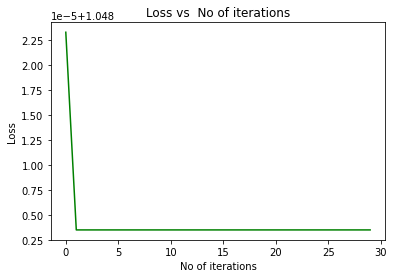

In [27]:
plt.plot(list(range(epoch)),adam_loss,color='green')
plt.xlabel("No of iterations")
plt.ylabel("Loss")
plt.title("Loss vs  No of iterations")